# Reading .mat files

In [7]:
import numpy as np
import matplotlib.pyplot as plt    

import scipy.io as io
from scipy import signal, stats

from scipy.signal import butter, lfilter, freqz, hilbert, chirp, argrelextrema
import os

import pandas as pd

from cs.csv2pd import *
from cs.plot_DataFilter import *
from cs.plot_hists import *
from cs.morletTransform import *

import os
import fnmatch #match pattern (of filename)
import numpy as np

from sympy.interactive import printing
printing.init_printing(use_latex=True)

import time
import datetime
import math

In [4]:
os.chdir('./data/mat_files/')

In [8]:
def getting_mat_files(directory=None):
    if directory:
        os.chdir(directory)
    mat_files=[]
    for file in os.listdir('.'):
        if fnmatch.fnmatch(file, '*.mat'):
            mat_files.append(file)
    return mat_files

In [13]:
mat_files=getting_mat_files()
print(mat_files)

['SingleFileContinuousDetection.mat', 'SingleFileContinuousDetection10.mat', 'SingleFileContinuousDetection12.mat', 'SingleFileContinuousDetection3.mat', 'SingleFileContinuousDetection8.mat']


In [17]:
def plotting_mat(file,sampling_freq,sampling_unit): #sampling unit "S" if seconds
    file = scipy.io.loadmat(file)
    data=file['__function_workspace__'][0]
    n_samples=len(file['__function_workspace__'][0])
    sampling_freq=sampling_freq #seconds ot 8/60 seconds/minute.. a genraliser
    timestamp=pd.date_range(end='2/18/2020 12:38:18', periods=n_samples, 
                            freq=str(sampling_freq)+sampling_unit)
    df=pd.DataFrame(data,index=timestamp)
    df_resampled=df.resample("H").mean()
    print("row data:")
    plot_DataFilter(df,0,order=2,fs=24,cutoff=5/14)
    print("averaged hourly:")
    plot_DataFilter(df_resampled,0,order=2,fs=24,cutoff=5/14)

row data:


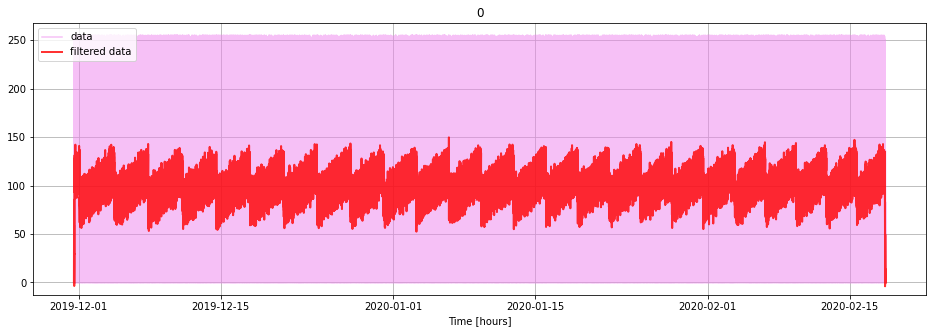

averaged hourly:


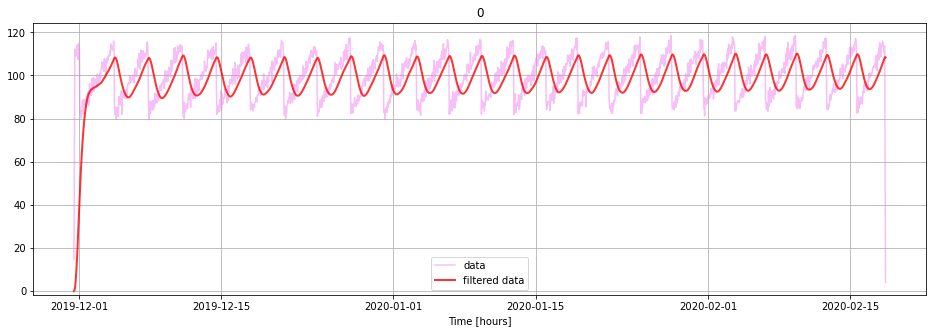

row data:


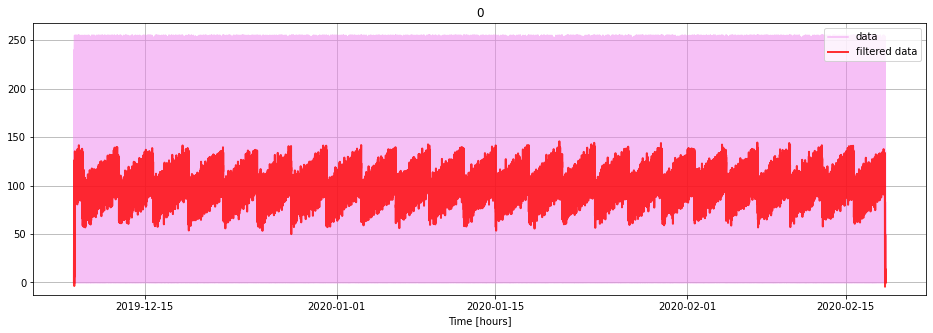

averaged hourly:


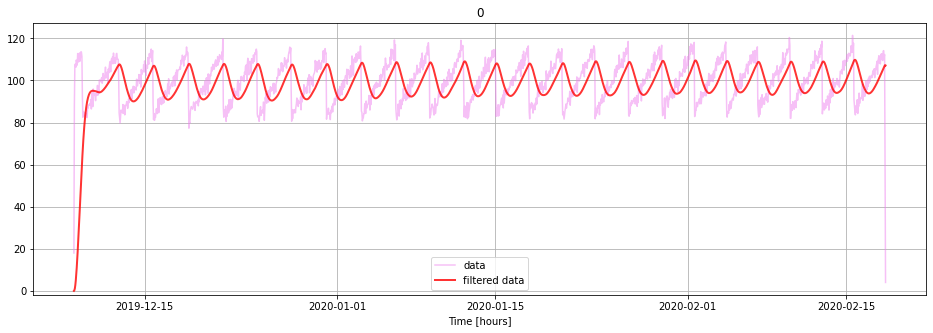

row data:


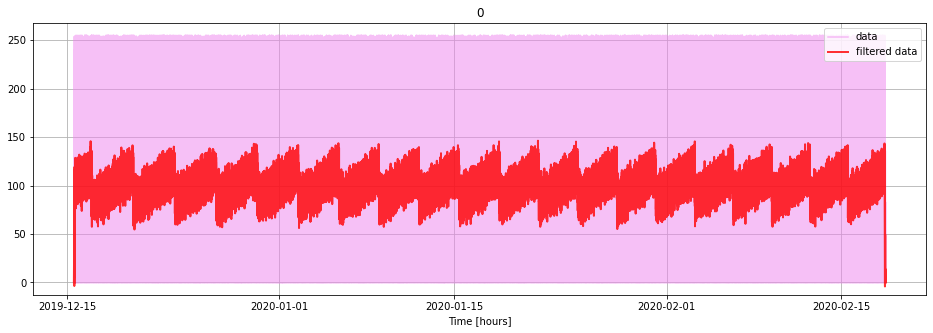

averaged hourly:


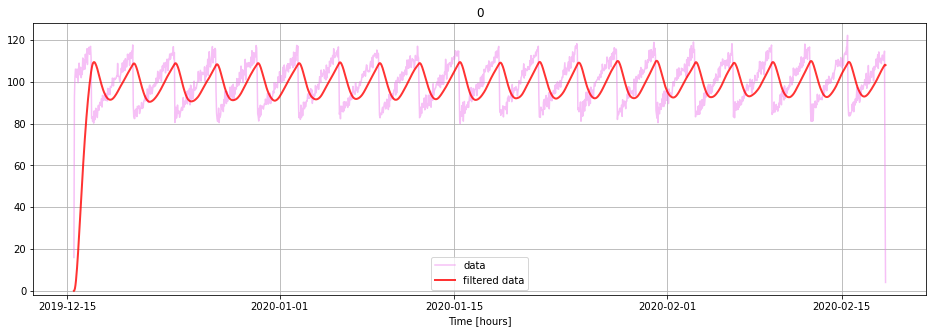

row data:


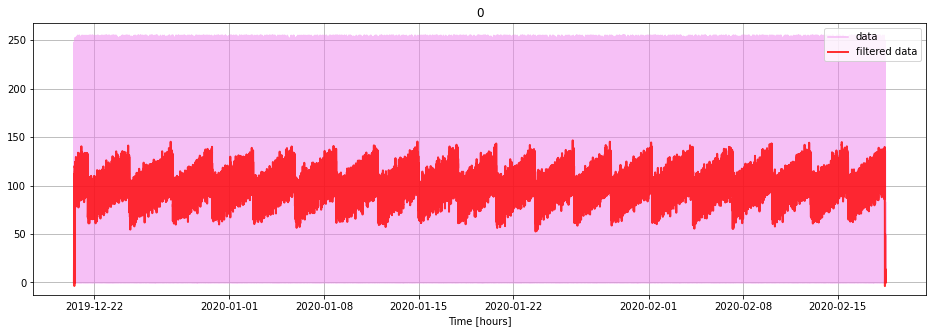

averaged hourly:


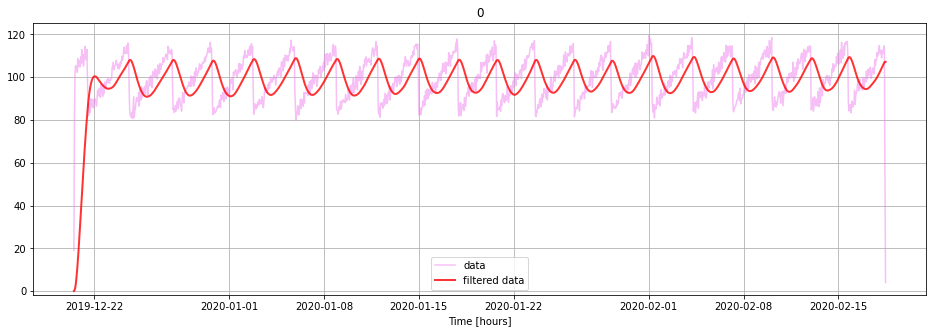

row data:


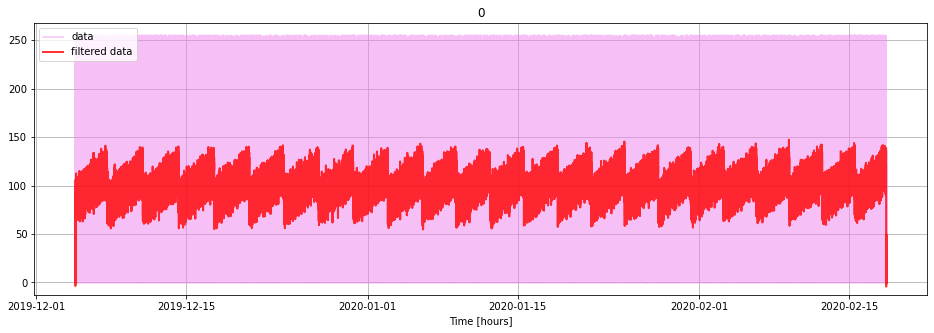

averaged hourly:


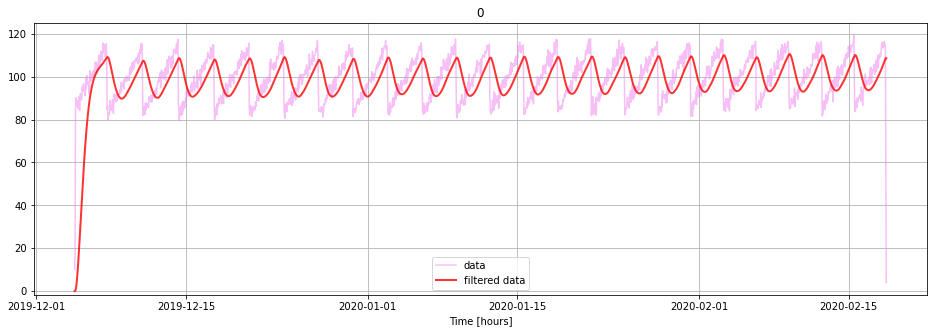

In [18]:
for mat_f in mat_files:
    plotting_mat(mat_f,7.5,"S")

In [5]:
mat = scipy.io.loadmat('SingleFileContinuousDetection.mat')

In [60]:
 timestamp=pd.date_range(end='2/18/2020 12:38:18', periods=n_samples, freq="7.5S")

In [84]:
df_data=pd.DataFrame(data,index=timestamp)

In [85]:
df_data=df_data.resample('H').mean()

In [86]:
df_data=df_data[2:-2]

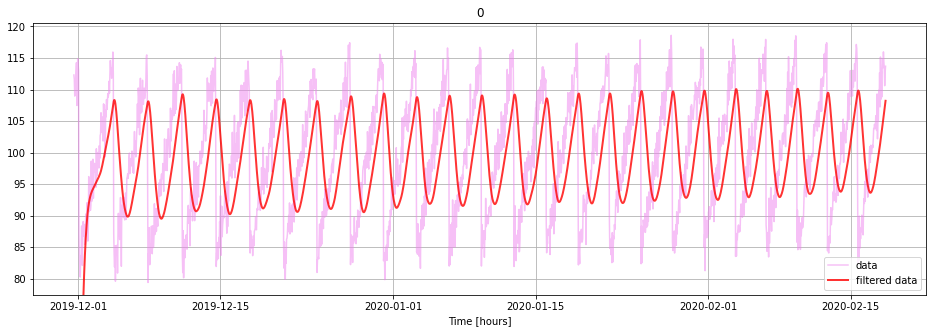

In [101]:
plot_DataFilter(df_data,0,order=2,fs=24,cutoff=5/14)

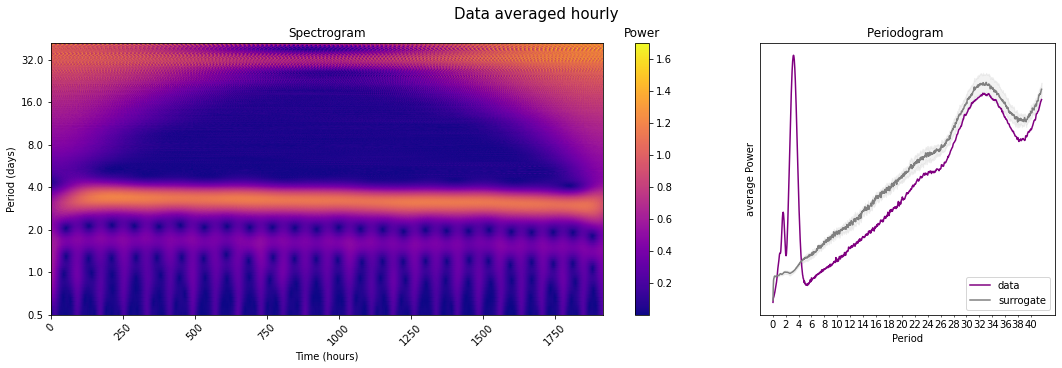

,0
2019-11-30 14:00:00,97.889205
2019-11-30 15:00:00,97.608902
2019-11-30 16:00:00,98.592803
2019-11-30 17:00:00,99.956250
2019-11-30 18:00:00,105.052841
...,...
2020-02-18 06:00:00,94.388258
2020-02-18 07:00:00,96.828030
2020-02-18 08:00:00,100.998106
2020-02-18 09:00:00,101.204545


In [102]:
plot_spect(df_data,0,title="Data averaged hourly",scale_max=1000)